In [5]:
# DNA Sequence Demonstration
# Author: Drishtii@, mu-arkhipov@
# Based on
# https://github.com/probml/pmtk3/blob/master/demos/seqlogoDemo.m
# See https://github.com/probml/pml-book/issues/581


##!pip install -qq logomaker


import jax.numpy as jnp
import os
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

seqs = [
    "atagccggtacggca",
    "ttagctgcaaccgca",
    "tcagccactagagca",
    "ataaccgcgaccgca",
    "ttagccgctaaggta",
    "taagcctcgtacgta",
    "ttagccgttacggcc",
    "atatccggtacagta",
    "atagcaggtaccgaa",
    "acatccgtgacggaa",
]

seq_len = len(seqs[0])
letter_to_cat = {"a": 0, "c": 1, "g": 2, "t": 3}
count_mat = jnp.zeros([seq_len, len(letter_to_cat)])
for seq in seqs:
    for n_pos, letter in enumerate(seq):
        count_mat = count_mat.at[n_pos, letter_to_cat[letter]].add(1)

prob_mat = count_mat / jnp.sum(count_mat, 1, keepdims=True)

# prob_mat = prob_mat.at[0].set([0.25, 0.25, 0.25, 0.25]) # for debugging

[[0.5 0.  0.  0.5]
 [0.1 0.2 0.  0.7]
 [1.  0.  0.  0. ]
 [0.1 0.  0.7 0.2]
 [0.  1.  0.  0. ]
 [0.1 0.8 0.  0.1]
 [0.1 0.  0.8 0.1]
 [0.  0.5 0.3 0.2]
 [0.1 0.  0.3 0.6]
 [0.9 0.  0.  0.1]
 [0.2 0.7 0.1 0. ]
 [0.2 0.4 0.4 0. ]
 [0.  0.  1.  0. ]
 [0.2 0.5 0.  0.3]
 [0.9 0.1 0.  0. ]]


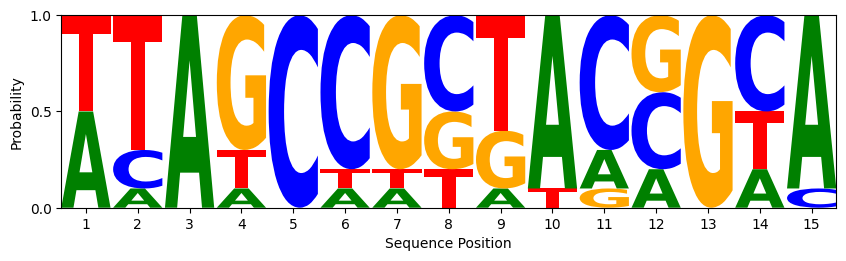

In [13]:
pos_height_mat = prob_mat
df = pd.DataFrame(pos_height_mat, columns=["A", "C", "G", "T"])
df.index = jnp.arange(1, len(df) + 1)

logos = logomaker.Logo(df)
logos.ax.set_xticks(jnp.arange(1, 16))
logos.ax.set_yticks(jnp.linspace(0, 1, 3))
logos.ax.set_ylabel("Probability")
logos.ax.set_xlabel("Sequence Position")
plt.show()

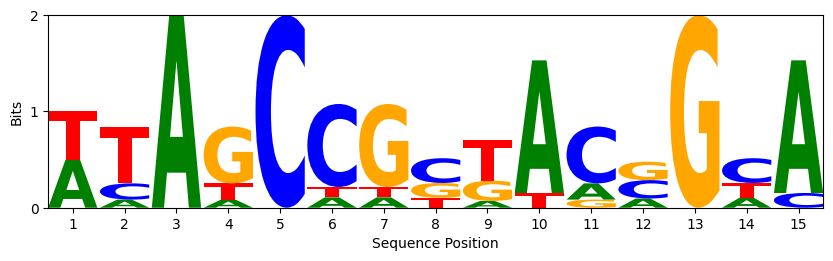

In [15]:
entropy = jnp.zeros(seq_len)
for n_pos in range(seq_len):
    entropy = entropy.at[n_pos].set(-sum(p * jnp.log2(p) for p in prob_mat[n_pos, :] if p > 0))
    # entropy[n_pos] = 2


# https://en.wikipedia.org/wiki/Sequence_logo#Consensus_logo
n = len(seqs)
e = 0  # (1/jnp.log(2)) * (4-1)/(2*n)  # small sample correction
pos_height_mat = prob_mat * (2 - entropy.reshape(-1, 1) + e)
# position
df = pd.DataFrame(pos_height_mat, columns=["A", "C", "G", "T"])
df.index = jnp.arange(1, len(df) + 1)

logos = logomaker.Logo(df)
logos.ax.set_xticks(jnp.arange(1, 16))
logos.ax.set_yticks(jnp.linspace(0, 2, 3))
logos.ax.set_ylabel("Bits")
logos.ax.set_xlabel("Sequence Position")
plt.show()
